# HOUSE PRICE PREDICTION MODEL

Dataset: California Housing from sklearn library

# Linear vs Ridge vs Lasso Regression

# IMPORT MODULES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATA SET (from sklearn library)

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()

In [ ]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
df = pd.DataFrame(data.data, columns= data.feature_names)
df['target']=data.target

# DATA EXPLORATION

In [ ]:
df.shape

(20640, 9)

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# EXPLORATORY DATA ANALYSIS

In [ ]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


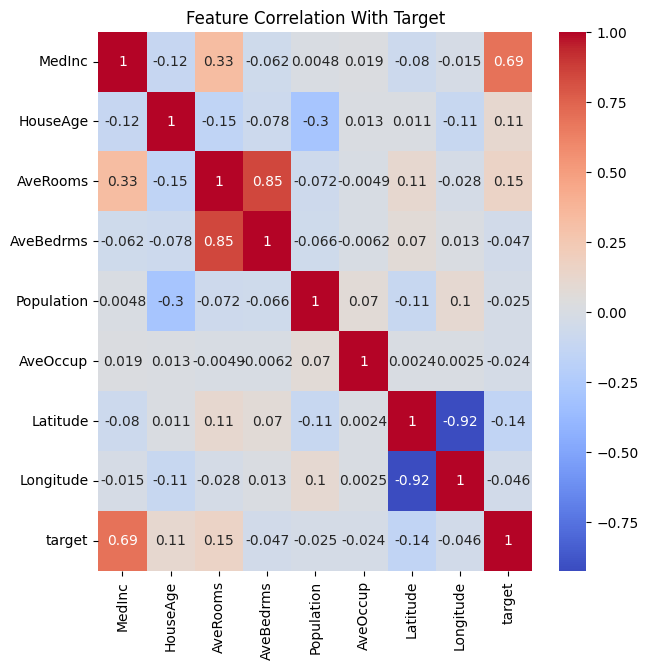

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation With Target")
plt.show()

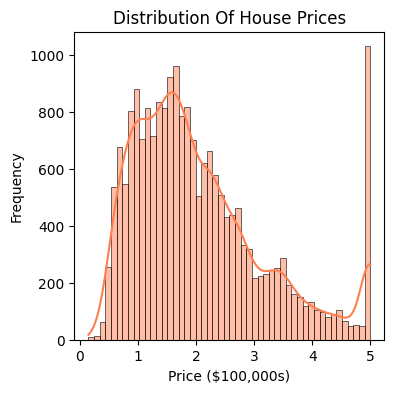

In [ ]:
plt.figure(figsize=(4,4))
sns.histplot(df['target'], bins=50, kde=True,color='coral')
plt.title("Distribution Of House Prices")
plt.xlabel("Price ($100,000s)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df['target'].skew()

np.float64(0.9777632739098345)

- The target (house price) is right-skewed.

- There's a sharp spike at 5.0, meaning many values are capped at the maximum value — this is a data cap/outlier.

- Very few houses beyond 4, and the spike at 5 is artificial

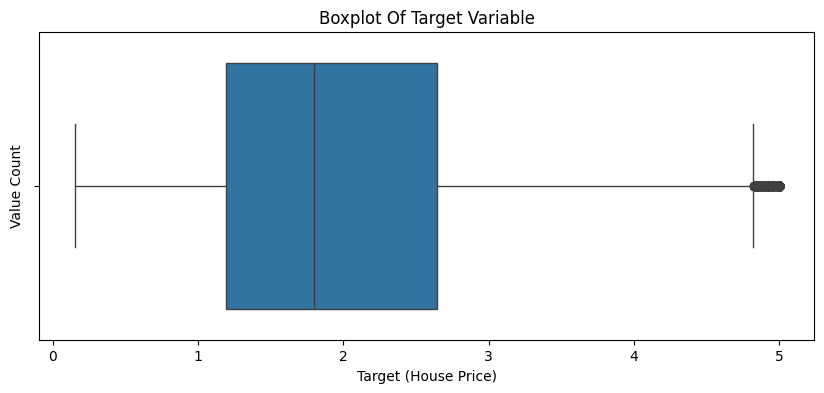

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['target'])
plt.title("Boxplot Of Target Variable")
plt.xlabel("Target (House Price)")
plt.ylabel("Value Count")
plt.show()

In [ ]:
df['target'].value_counts().sort_index().tail()

,count
target,
4.98800,1
4.99000,1
4.99100,1
5.00000,27
5.00001,965


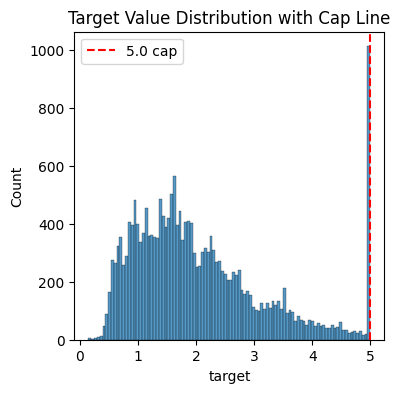

In [ ]:
plt.figure(figsize=(4,4))
sns.histplot(df['target'], bins=100)
plt.axvline(5.0, color='red', linestyle='--', label='5.0 cap')
plt.title("Target Value Distribution with Cap Line")
plt.legend()
plt.show()


# DEFINING PREDICTION TASK

| Term             | Meaning                                                            |
| ---------------- | ------------------------------------------------------------------ |
| **Features (X)** | The **input variables** — information you use to predict something |
| **Target (y)**   | The **output variable** — the thing you’re trying to predict       |


In [ ]:
x = df.drop('target', axis=1) # all variables except target
y=df['target'] # target variable

# SPLITTING INTO TRAIN & TEST

| Set                  | Use                   |                           |
| -------------------- | --------------------- | ---------------------------- |
| `X_train`, `y_train` | Model learns patterns |
| `X_test`, `y_test`   | Model is tested       |

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_raw, x_test_raw, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# SCALING MODELS

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train_raw)
x_test = scaler.transform(x_test_raw)

# FITTING MODELS

We are training the model to learn the relationship between the input features (x) and the target (y) using a mathematical equation.

- Only Use Training Data for .fit()

Training your model on the entire dataset (including test data) would "leak" information from the future. That makes your evaluation unfair and unrealistic.

*  Training Data → used to learn the model parameters

*  Test Data → NEVER used for learning; only used to evaluate performance

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression



lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

# Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge.fit(x_train,y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0])

# Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas=[0.1,0.5,1.0])
lasso.fit(x_train,y_train)

LassoCV(alphas=[0.1, 0.5, 1.0])

EVALUATING MODELS

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluate(model,model_name):

  y_pred = model.predict(x_test)

  rmse = root_mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)

  print(f"{model_name}:")
  print(f"RMSE:{rmse:.4f}")
  print(f"MAE:{mae:.4f}")
  print(f"R²:{r2:.4f}\n")

evaluate(lin_reg, "Linear Regression")
evaluate(ridge, "Ridge Regression")
evaluate(lasso, "Lasso Regression")

Linear Regression:
RMSE:0.7456
MAE:0.5332
R²:0.5758

Ridge Regression:
RMSE:0.7456
MAE:0.5332
R²:0.5758

Lasso Regression:
RMSE:0.8244
MAE:0.6222
R²:0.4814



| Model      | RMSE   | MAE    | R²     | Notes             |
| ---------- | ------ | ------ | ------ | ----------------- |
| **Linear** | 0.7456 | 0.5332 | 0.5758 | Baseline          |
| **Ridge**  | 0.7456 | 0.5332 | 0.5758 | Same as Linear    |
| **Lasso**  | 0.8244 | 0.6222 | 0.4814 | Worse performance |


- Lasso adds L1 regularization, which shrinks some coefficients to zero (feature selection)

- This is useful when you have many unimportant or redundant features

- The dataset has only 8 features, and all seem useful
- Lasso is likely removing good features, hurting performance

In [ ]:
# Lasso Coefficients

print(pd.Series(lasso.coef_, index=x.columns))

MedInc        0.710598
HouseAge      0.106453
AveRooms     -0.000000
AveBedrms     0.000000
Population   -0.000000
AveOccup     -0.000000
Latitude     -0.011469
Longitude    -0.000000
dtype: float64


In [ ]:
# coefficients are very close to zero-  meaning Lasso ignored them.
# That’s why error (RMSE/MAE) went up and R² dropped.

In [ ]:
# we can also compare coefficients of all 3 regressions in dataframe format

coeff_df = pd.DataFrame({
    'Feature': x.columns,
    'Linear': lin_reg.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

coeff_df

,Feature,Linear,Ridge,Lasso
0,MedInc,0.854383,0.854327,0.710598
1,HouseAge,0.122546,0.122624,0.106453
2,AveRooms,-0.294410,-0.294210,-0.000000
3,AveBedrms,0.339259,0.339008,0.000000
4,Population,-0.002308,-0.002282,-0.000000
5,AveOccup,-0.040829,-0.040833,-0.000000
6,Latitude,-0.896929,-0.896168,-0.011469
7,Longitude,-0.869842,-0.869071,-0.000000


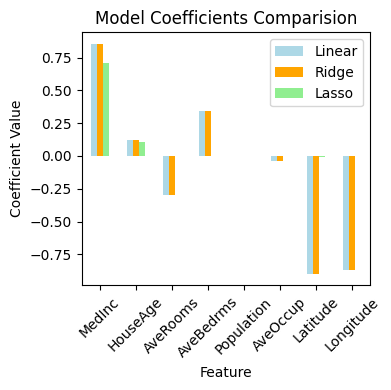

In [ ]:
coeff_df.set_index('Feature').plot(kind='bar',figsize=(4,4), color=['lightblue','orange','lightgreen'])
plt.title('Model Coefficients Comparision')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. MedInc (Median Income)
- Has the largest positive impact on house price.

- All three models agree (highest positive coefficient).

2. Latitude and Longitude
- Have large negative coefficients, meaning:

- Houses farther south or west (lower latitude or more negative longitude) are predicted to be cheaper.
- All models agree here.

3. AveRooms and AveBedrms
- Lower coefficients — smaller influence.

- Lasso has reduced AveRooms very close to 0 → feature selection in action.

- Lasso "thinks" it's less useful and shrinks it more than others.

4. Population and AveOccup
- Very small bars — minimal impact on prediction.

- Lasso may have zeroed out one or both → showing its nature of eliminating weak features.

| Concept          | Ridge                        | Lasso                            |
| ---------------- | ---------------------------- | -------------------------------- |
| Purpose          | Reduce overfitting           | Shrink unimportant features to 0 |
| Use Case         | Multicollinearity            | Feature selection                |
| Penalty          | L2 (squares of coefficients) | L1 (absolute values)             |
| Model Complexity | Lower variance               | Simpler, sparse models           |


# Best Model

In [ ]:
best_model = ridge

In [ ]:
y_pred = best_model.predict(x_test)

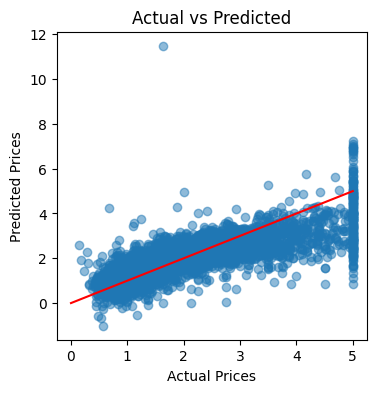

In [ ]:
# Prediction vs Actual

plt.figure(figsize=(4,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')  # 45° line
plt.show()


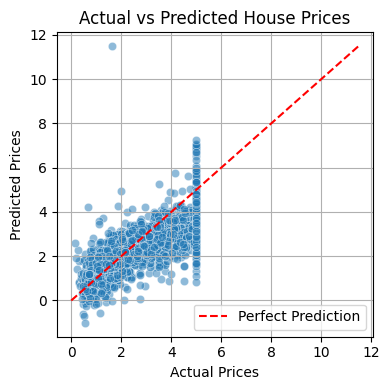

In [ ]:


result = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

plt.figure(figsize=(4,4))
sns.scatterplot(data=result,x='Actual',y='Predicted', alpha=0.5)

# 45-degree line (perfect prediction)
max_val = max(y_test.max(),y_pred.max())
sns.lineplot(x=[0,max_val], y=[0,max_val],color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Residuals

- Residual = Actual value − Predicted value
- It tells us how far off the model was for each prediction.

In a well-performing regression model, residuals should be:
- Roughly centered around 0
- Symmetrically distributed (like a bell curve)
- No strong skew or unusual spikes

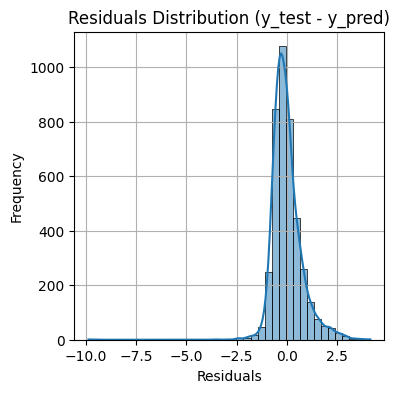

In [ ]:

residuals = y_test - y_pred

plt.figure(figsize=(4,4))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residuals Distribution (y_test - y_pred)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


The residuals are mostly centered around zero and normally distributed, indicating a fairly good fit. However, the left-skewed tail suggests the model slightly underpredicts for some high-priced houses.

In [ ]:
print("Best alpha (Ridge):", ridge.alpha_)


Best alpha (Ridge): 1.0


In [ ]:
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("RIDGE REGRESSION EVALUATION")
print()
print(f"RMSE: {rmse}")
print(f"MAE{mae}")
print(f"R²:{r2}")

RIDGE REGRESSION EVALUATION

RMSE: 0.7455567442826609
MAE0.5331931195793179
R²:0.5758157428900221


# Interpretation:
- The Ridge Regression model built on the California Housing dataset shows a moderate ability to predict house prices based on the available features.

- An RMSE of 0.74 means that, on average, the model’s predictions are off by about $74,560 (since the target is in 100,000s).

- The MAE of 0.53 suggests that half of the absolute prediction errors are within about $53,320.

- The R² value of 0.5758 indicates that about 57.58% of the variance in house prices is explained by the model.

# Limitations:

- The model assumes a linear relationship between features and target, which may not capture complex patterns in the housing data.

- The performance is limited likely due to nonlinear relationships, interactions, or missing features (like number of schools nearby, crime rate, etc.).

- The model underperforms at extreme price ranges (as seen in scatter plots).

# SAMPLE PREDICTIONS

In [ ]:
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
           'Population', 'AveOccup', 'Latitude', 'Longitude']

In [ ]:
sample_input = pd.DataFrame([[8.5, 30, 6, 1, 1000, 3, 37.5, -122.1]], columns=columns)

# Scale and predict

sample_scaled = scaler.transform(sample_input)
prediction = best_model.predict(sample_scaled)
print("Predicted House Value: $", prediction[0] * 100000)

Predicted House Value: $ 432597.9229242225


In [ ]:
sample_input = pd.DataFrame([[8.5, 30, 6, 1, 1000, 3, 37.5, -122.1]], columns=columns)

# Scale and predict

sample_scaled = scaler.transform(sample_input)
prediction = best_model.predict(sample_scaled)
print("Predicted House Value: $", prediction[0]*100000)

Predicted House Value: $ 432597.9229242225
